# Exam 28th of August 2024 — Course 1MS041 (Introduction to Data Science)

## 1.1 Instructions
1. Complete the problems by following instructions.  
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has **3 problems** for a total of **40 points**, to pass you need **20 points**.  
The bonus will be added to the score and rounded afterwards.

## 1.2 Some general hints and information
- Try to answer all questions even if you are uncertain.  
- Comment your code — partial credit is given if your reasoning is clear.  
- Follow the instruction sheet rigorously.  
- The exam is partially autograded, but your code and free text answers are manually graded anonymously.

## 1.3 Tips for free text answers
You can write LaTeX in Markdown cells:

- `$f(x) = x^2$` → inline math  
- `$$f(x)=x^2$$` → centered display math  

Example:

$$f_{Y|X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha x + \beta)$$

## 1.4 Rules
- You may **not communicate with others** during the exam.  
- You may **not use AI systems such as ChatGPT**.  
- Your online and offline activity may be monitored.

## 1.5 Good luck!

---

### Insert your anonymous exam ID below:


In [ ]:
examID = "XXX"

### Exam vB, PROBLEM 1  
**Maximum Points = 14**

In this problem you will do rejection sampling from complicated distributions, and you will also use your samples to compute certain integrals, a method known as *Monte Carlo integration*.  
(Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection.)

1. **[4p]** Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the density, using rejection sampling:

$$f(x) = C (\sin x)^{10}, \quad 0 \le x \le \pi$$


where \(C\) is a value such that \(f\) above is a density (i.e. integrates to one).  
*Hint:* you do not need to know the value of \(C\) to perform rejection sampling.

2. **[2p]** Produce 10 000 samples (use fewer if it takes too long) from the above distribution, put the answer in the variable `problem1_samples`, and plot the histogram.

3. **[2p]** Define \(X\) as a random variable with the density given in part 1. Denote


$$Y = \left(X - \frac{\pi}{2}\right)^2$$


and use the 10 000 samples from part 2 to estimate \(\mathbb{E}[Y]\). Store the result in `problem1_expectation`.

4. **[2p]** Use Hoeffding’s inequality to produce a 95% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`.

5. **[4p]** Can you calculate an approximation of the value of \(C\) from part 1 using random samples?  
Provide a plot of the histogram from part 2 together with the true density as a curve (this requires the value of \(C\)).  
Explain what method you used and what answer you got.


In [1]:
# Part 1
import numpy as np
import pandas as pd
def problem1_rejection(n_samples=1):
    """
    Use rejection sampling to draw samples from
        f(x) ∝ (sin x)^10   on [0, π]
    Return a numpy array of length n_samples.
    """
    samples = []
    while (len(samples) < n_samples):
        x = np.random.uniform(0, np.pi)
        u = np.random.uniform(0, 1)
        alpha = np.sin(x)**10
        
        if (u <= alpha):
            samples.append(x)
    return np.array(samples)

Length of samples array: (10000,)


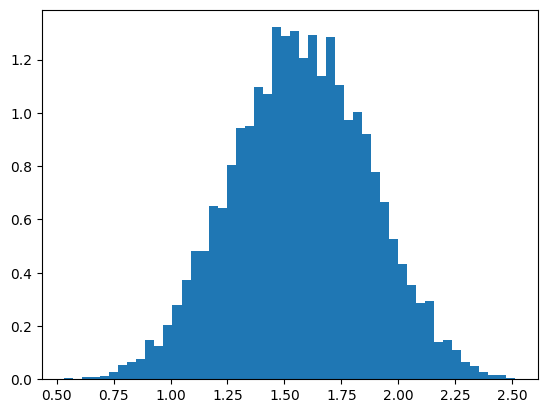

In [5]:
# Part 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

n_samples = 10000
problem1_samples = problem1_rejection(n_samples)

print(f"Length of samples array: {problem1_samples.shape}")


plt.hist(problem1_samples, bins=50, density=True)
plt.show()

In [ ]:
# Part 3
X = problem1_samples
# Y = (X - pi/2)**2
Y = (X - np.pi/2)**2

expectation = np.mean(Y)
problem1_expectation = expectation

print(f"This is the expectation: {problem1_expectation}")

This is the expectation: 0.09145807284563004


In [4]:
# Part 4

a, b = 0, (np.pi/2)**2
n = n_samples
alpha = 0.05

epsilon = (b-a) * np.sqrt(np.log(alpha/2) / (-2*n))

lower = problem1_expectation - epsilon
upper = problem1_expectation + epsilon

problem1_interval = (lower, upper)

print(f"This is the interval: {problem1_interval}")

This is the interval: (np.float64(0.057948261103430675), np.float64(0.1249678845878294))


This is C: 1.2878807186173205


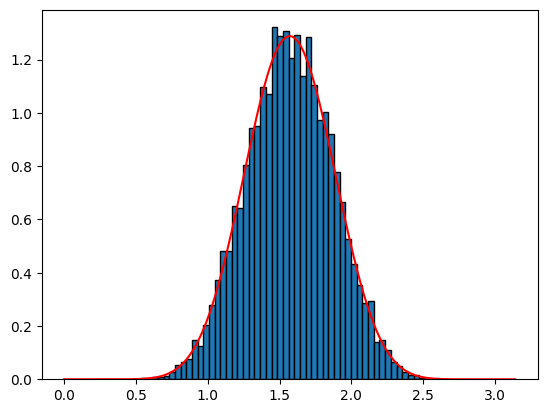

In [19]:
# Part 5 — numeric computation of C

n_samples = 10000
problem5_samples = np.random.uniform(0, np.pi, n_samples)
a,b = 0, np.pi

I = (b-a) * np.mean(np.sin(problem5_samples)**10)

C = 1 / I

problem1_C = C
print(f"This is C: {problem1_C}")


plt.hist(problem1_samples, bins=50, density=True, edgecolor="black")

x_values = np.linspace(0, np.pi, 400)
fx = C * np.sin(x_values)**10
plt.plot(x_values, fx, color="red")

plt.show()


In [ ]:
# Part 5 — plot
# Write your plotting code here
# XXXXX

## Part 5 — Explanation

Double-click to edit:

### Begin explanation

(Write your method and the approximation of C here.)

### End explanation


## Local Test for Exam vB, PROBLEM 1

Evaluate the cell below to verify that your answers have correct format.

Do NOT modify anything in the test cell.


In [20]:
# This cell checks the format, not correctness
import numpy as np

try:
    assert isinstance(problem1_rejection(10), np.ndarray)
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert isinstance(problem1_samples, np.ndarray)
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert isinstance(problem1_expectation, float)
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert (isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple))
    assert len(problem1_interval) == 2
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_expectation is a float
Good, your problem1_interval is a tuple or list of length 2


## 2.1 Exam vB, PROBLEM 2  
**Maximum Points: 13**

Consider the dataset `CORIS.csv` in the `data` folder. The dataset contains cases of coronary heart disease (CHD) and variables associated with the patient’s condition:

- systolic blood pressure (`sbp`)
- yearly tobacco use in kg (`tobacco`)
- low density lipoprotein (`ldl`)
- adiposity
- family history (0 or 1) (`famhist`)
- type A personality score (`typea`)
- obesity (body mass index)
- alcohol use
- age
- diagnosis of CHD (0 or 1) (`chd`)

Here:
- **X** corresponds to the measurements,
- **Y** is a 0–1 label where 1 represents CHD and 0 represents no CHD.

The code to load the data, perform a train–test–validation split, and train a model is already prepared for you.  
The trained model is stored in `problem2_pipe`, which is an `sklearn` `Pipeline`.

---

### **1. [3p]**

Use **Hoeffding’s inequality** and compute the **95% confidence intervals** for **precision and recall** (etc.) on the **test set**.  
Store your intervals for each class in the variables:

- `problem2_precision0`
- `problem2_recall0`
- `problem2_precision1`
- `problem2_recall1`

Each of these should be a **tuple** `(lower, upper)`.

---

### **2. [3p]**

You are interested in minimizing the **average cost** of your classifier.  
The hospital will use the model as a screening tool:

- If the model predicts **CHD = 1**, the patient is sent for further investigation.
- If the model predicts **CHD = 0**, nothing is done.

You decide to use the following costs:

- True positive (CHD = 1, predicted 1): cost = 0  
- True negative (CHD = 0, predicted 0): cost = 0  
- False positive (CHD = 0, predicted 1): cost = 10  
- False negative (CHD = 1, predicted 0): cost = 300  *(worst case)*

Complete the function `problem2_cost(model, threshold, X, Y)` to compute the **average cost per person** for a given prediction threshold, using `model.predict_proba`.

---

### **3. [4p]**

Select the **threshold** between 0 and 1 that minimizes the **average cost** on the **test set**.  
Check, for example, **100 evenly spaced thresholds** between 0 and 1.

Store:

- the optimal threshold in `problem2_optimal_threshold`
- the cost at this threshold (on the test set) in `problem2_cost_at_optimal_threshold`

---

### **4. [3p]**

With your newly computed threshold, compute the **cost of putting the model in production** by evaluating the cost on the **validation set**.

Also compute a **99% confidence interval** for this cost using **Hoeffding’s inequality**, and store it as:

- `problem2_cost_at_optimal_threshold_validation`
- `problem2_cost_interval = (lower, upper)`


In [21]:
# RUN THIS CELL TO LOAD THE DATA AND SPLIT IT INTO TRAINING, TEST AND VALIDATION SETS
# FINALLY IT TRAINS THE MODEL AS A PIPELINE

import pandas as pd
from sklearn.model_selection import train_test_split

CORISDataset = pd.read_csv("data/CORIS.csv", skiprows=[1, 2])

# Initial data split into features and target
problem2_X = CORISDataset[
    ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
].values  # Features
problem2_Y = CORISDataset['chd'].values  # Target variable

# Split the data into training, test and validation sets
problem2_X_train, X_tmp, problem2_Y_train, Y_tmp = train_test_split(
    problem2_X, problem2_Y, train_size=0.6, random_state=42
)
problem2_X_test, problem2_X_val, problem2_Y_test, problem2_Y_val = train_test_split(
    X_tmp, Y_tmp, train_size=0.5, random_state=42
)

# Show the shapes of the data
print(
    problem2_X_train.shape,
    problem2_Y_train.shape,
    problem2_X_test.shape,
    problem2_Y_test.shape,
    problem2_X_val.shape,
    problem2_Y_val.shape,
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a logistic regression model
problem2_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42)),
])

# Fit the pipeline to the training data
problem2_pipe.fit(problem2_X_train, problem2_Y_train)


(277, 9) (277,) (92, 9) (92,) (93, 9) (93,)


,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


## 2.1 Exam vB, PROBLEM 2  
**Maximum Points: 13**

Consider the dataset `CORIS.csv` in the `data` folder. The dataset contains cases of coronary heart disease (CHD) and variables associated with the patient’s condition:

- systolic blood pressure (`sbp`)
- yearly tobacco use in kg (`tobacco`)
- low density lipoprotein (`ldl`)
- adiposity
- family history (0 or 1) (`famhist`)
- type A personality score (`typea`)
- obesity (body mass index)
- alcohol use
- age
- diagnosis of CHD (0 or 1) (`chd`)

Here:
- **X** corresponds to the measurements,
- **Y** is a 0–1 label where 1 represents CHD and 0 represents no CHD.

The code to load the data, perform a train–test–validation split, and train a model is already prepared for you.  
The trained model is stored in `problem2_pipe`, which is an `sklearn` `Pipeline`.

---

### **1. [3p]**

Use **Hoeffding’s inequality** and compute the **95% confidence intervals** for **precision and recall** (etc.) on the **test set**.  
Store your intervals for each class in the variables:

- `problem2_precision0`
- `problem2_recall0`
- `problem2_precision1`
- `problem2_recall1`

Each of these should be a **tuple** `(lower, upper)`.

---



In [ ]:
# Part 1
# To make a prediction on a dataset `X` you can use the following code:

# As with any sklearn model, you can also use:
#   probas = problem2_pipe.predict_proba(X)

# Each precision and recall should be a tuple, for instance:
#   precision0 = (0.9, 0.95)
# The 0 or 1 in the variable name indicates the class.

y_pred = problem2_pipe.predict(problem2_X_test)
y_true = problem2_Y_test

a,b = 0,1
alpha = 0.05

def hoeffding(p, n):
    epsilon = (b-a)*np.sqrt(np.log(alpha/2) / (-2*n))
    
    lower = max(0,p - epsilon)
    upper = min(1, p + epsilon)
    
    return (lower, upper)

precision0 = precision_score(y_true, y_pred, pos_label=0)
precision1 = precision_score(y_true, y_pred, pos_label=1)

recall0 = recall_score(y_true, y_pred, pos_label=0)
recall1 = recall_score(y_true, y_pred, pos_label=1)

precision0_n = np.sum(y_pred == 0)
precision1_n = np.sum(y_pred == 1)

recall0_n = np.sum(y_true == 0)
recall1_n = np.sum(y_true == 1)


problem2_precision0 = hoeffding(precision0, precision0_n)
problem2_recall0    = hoeffding(recall0, recall0_n)
problem2_precision1 = hoeffding(precision1, precision1_n)
problem2_recall1    = hoeffding(recall1, recall1_n)

print("precision 0: ", problem2_precision0)
print("precision 1: ", problem2_precision1)
print("recall 0: ", problem2_recall0)
print("recall 1: ", problem2_recall1)

# The code below will check that you supply the proper type
assert(type(problem2_precision0) == tuple)
assert(len(problem2_precision0) == 2)
assert(type(problem2_recall0) == tuple)
assert(len(problem2_recall0) == 2)
assert(type(problem2_precision1) == tuple)
assert(len(problem2_precision1) == 2)
assert(type(problem2_recall1) == tuple)
assert(len(problem2_recall1) == 2)

precision 0:  (np.float64(0.5958623105324226), np.float64(0.9353876894675774))
precision 1:  (np.float64(0.42191436672646065), np.float64(0.9352284904163966))
recall 0:  (np.float64(0.6665001207136134), 1)
recall 1:  (np.float64(0.3259110409823518), np.float64(0.7917360178411776))


### **2. [3p]**

You are interested in minimizing the **average cost** of your classifier.  
The hospital will use the model as a screening tool:

- If the model predicts **CHD = 1**, the patient is sent for further investigation.
- If the model predicts **CHD = 0**, nothing is done.

You decide to use the following costs:

- True positive (CHD = 1, predicted 1): cost = 0  
- True negative (CHD = 0, predicted 0): cost = 0  
- False positive (CHD = 0, predicted 1): cost = 10  
- False negative (CHD = 1, predicted 0): cost = 300  *(worst case)*

Complete the function `problem2_cost(model, threshold, X, Y)` to compute the **average cost per person** for a given prediction threshold, using `model.predict_proba`.

---



In [28]:
# Part 2
def problem2_cost(model, threshold, X, Y):
    pred_proba = model.predict_proba(X)[:, 1]
    y_pred = (pred_proba >= threshold) * 1
    y_true = Y
    # Fill in what is missing to compute the cost and return it
    # Note that we are interested in average cost (cost per person)
    tp_cost = 0
    tn_cost = 0
    fp_cost = 10
    fn_cost = 300
    
    # True Positives: fraud correctly detected
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    # True Negatives: legitimate transactions correctly allowed
    TN = np.sum((y_true == 0) & (y_pred == 0))
    
    # False Positives: legitimate transactions incorrectly blocked
    FP = np.sum((y_true == 0) & (y_pred == 1))
    
    # False Negatives: fraud that was missed
    FN = np.sum((y_true == 1) & (y_pred == 0))
    total_cost = ((TP * tp_cost) + (TN * tn_cost) + (FP * fp_cost) + (FN * fn_cost))
    avg_cost = total_cost / len(y_true)
    
    return avg_cost

### **3. [4p]**

Select the **threshold** between 0 and 1 that minimizes the **average cost** on the **test set**.  
Check, for example, **100 evenly spaced thresholds** between 0 and 1.

Store:

- the optimal threshold in `problem2_optimal_threshold`
- the cost at this threshold (on the test set) in `problem2_cost_at_optimal_threshold`

---



In [29]:
# Part 3

thresholds = np.linspace(0, 1, 100)
best_cost = np.inf
best_t = 0
for t in thresholds:
    cost = problem2_cost(problem2_pipe, t, problem2_X_test, problem2_Y_test)
    
    if cost <= best_cost:
        best_cost = cost
        best_t = t

problem2_optimal_threshold = best_t
problem2_cost_at_optimal_threshold = best_cost

print(f"This is best t: {problem2_optimal_threshold} \nThis is best cost: {problem2_cost_at_optimal_threshold}")

This is best t: 0.07070707070707072 
This is best cost: 5.217391304347826


### **4. [3p]**

With your newly computed threshold, compute the **cost of putting the model in production** by evaluating the cost on the **validation set**.

Also compute a **99% confidence interval** for this cost using **Hoeffding’s inequality**, and store it as:

- `problem2_cost_at_optimal_threshold_validation`
- `problem2_cost_interval = (lower, upper)`


In [32]:
# Part 4
problem2_cost_at_optimal_threshold_validation = problem2_cost(problem2_pipe, 
                                                              problem2_optimal_threshold,
                                                              problem2_X_val,
                                                              problem2_Y_val)

print(f"This is cost at validation set: {problem2_cost_at_optimal_threshold_validation}")

# Report the cost interval as a tuple cost_interval = (a, b)

alpha = 0.01
a,b = 0, 300
n = len(problem2_Y_val)

epsilon = (b-a) * np.sqrt(np.log(alpha/2) / (-2*n))

lower = max(0, problem2_cost_at_optimal_threshold_validation - epsilon)
upper = min(300, problem2_cost_at_optimal_threshold_validation + epsilon)

problem2_cost_interval = (lower, upper)

print(f"This is cost interval: {problem2_cost_interval}")

This is cost at validation set: 5.698924731182796
This is cost interval: (0, np.float64(56.33193719889502))


In [33]:
# The code below will tell you if you filled in the interval correctly
assert(type(problem2_cost_interval) == tuple)
assert(len(problem2_cost_interval) == 2)

# 2.2 Exam vB, PROBLEM 3  
**Maximum Points: 13**

![Markov Chains](exam240828-markovImage.png)

Consider the following two Markov chains:

**Markov chain A**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Markov chain B**


Answer each question for **both chains**:

---

### **1. [2p]**  
What is the **transition matrix**?  
Your answer for each chain should be a NumPy array of shape `(n_states, n_states)`  
where states `(A, B, …)` correspond to indices `(0, 1, …)`.

---

### **2. [1p]**  
Is the Markov chain **irreducible**?  
Answer with `True` or `False` for each chain.

---

### **3. [4p]**  
Is the Markov chain **aperiodic**?  
What is the **period of each state**?

Provide:

- a boolean (`True`/`False`) indicating if the chain is aperiodic
- a NumPy array with the **period of each state**, shape `(n_states,)`

*Hint:* Recall the definition of period:  

$$\text{period}(i) = \gcd\{\, t \ge 1 : P(X_t = i \mid X_0 = i) > 0 \,\}$$


---

### **4. [2p]**  
If the chain starts in state A at time 0, what is the probability of being in state B at time 5?  

Store this in:

- `problem3_A_PB5`
- `problem3_B_PB5`

---

### **5. [4p]**  
Let \(T\) be the **first hitting time of state D**, starting from state A:


$$T(\omega) = \inf \{\, t \in \mathbb{N} : X_t(\omega) = D \,\}$$


where the infimum over an empty set is $\infty$.

Compute:

- $P(T = 1)$  
- $P(T = 2)$  
- $P(T = 3)$  
- $P(T = 4)$  
- $P(T = 5)$  
- $P(T = \infty)$  


for both chains A and B, and store them in the provided variables.


![Markov Chains](exam240828-markovImage.png)

Consider the following two Markov chains:

**Markov chain A**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Markov chain B**


Answer each question for **both chains**:

---

### **1. [2p]**  
What is the **transition matrix**?  
Your answer for each chain should be a NumPy array of shape `(n_states, n_states)`  
where states `(A, B, …)` correspond to indices `(0, 1, …)`.


In [35]:
# PART 1
# ------------------------ TRANSITION MATRIX -------------------------------

# Supply each transition matrix as a numpy array of shape (n_states, n_states).
# State order must match exam order, typically (A, B, C, D, ...).

problem3_A = np.array([[0, 0.2, 0, 0.8], [0, 0, 1, 0], [0, 1, 0, 0], [0.5, 0, 0.5, 0]])
problem3_B = np.array([[0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0.5, 0, 0.5, 0, 0], [0, 0, 0.5, 0, 0.5, 0], [0, 0, 0, 0, 0, 1], [0.5, 0, 0, 0, 0.5, 0]])

print("Array A: \n", problem3_A)
print("Array B: \n", problem3_B)

Array A: 
 [[0.  0.2 0.  0.8]
 [0.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [0.5 0.  0.5 0. ]]
Array B: 
 [[0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0.5 0. ]]


In [ ]:
# PART 2
# ------------------------ IRREDUCIBLE -------------------------------

problem3_A_irreducible = False
problem3_B_irreducible = True

![Markov Chains](exam240828-markovImage.png)

In [ ]:
# PART 3
# ------------------------ APERIODIC -------------------------------

# Answer each with True or False
problem3_A_is_aperiodic = False
problem3_B_is_aperiodic = False

# A numpy array of shape (n_states,) containing periods for each state
problem3_A_periods = np.array([2,2,2,2])
problem3_B_periods = np.array([2,2,2,2,2,2])

In [36]:
# PART 4
# ------------------------ PROBABILITY OF B AFTER 5 STEPS -------------------------------
# From A -> B after 5 time steps:

PA5 = np.linalg.matrix_power(problem3_A, 5)
PB5 = np.linalg.matrix_power(problem3_B, 5)

probA = PA5[0, 1]
probB = PB5[0, 1]

problem3_A_PB5 = probA
problem3_B_PB5 = probB

print(f"Probability matrix A: {problem3_A_PB5} \nProbability matrix B: {problem3_B_PB5}")

Probability matrix A: 0.872 
Probability matrix B: 0.375


![Markov Chains](exam240828-markovImage.png)

### **5. [4p]**  
Let \(T\) be the **first hitting time of state D**, starting from state A:


$$T(\omega) = \inf \{\, t \in \mathbb{N} : X_t(\omega) = D \,\}$$


where the infimum over an empty set is $\infty$.

Compute:

- $P(T = 1)$  
- $P(T = 2)$  
- $P(T = 3)$  
- $P(T = 4)$  
- $P(T = 5)$  
- $P(T = \infty)$  

In [37]:
# PART 5
# ------------------------ HITTING TIME DISTRIBUTION -------------------------------

# Probabilities for T = 1, 2, 3, 4, 5, and ∞ for chain A
problem3_A_PT1 = 0.8
problem3_A_PT2 = 0
problem3_A_PT3 = 0
problem3_A_PT4 = 0
problem3_A_PT5 = 0
problem3_A_PT_inf = 0.2

# Probabilities for chain B
problem3_B_PT1 = 0
problem3_B_PT2 = 0
problem3_B_PT3 = 0.5
problem3_B_PT4 = 0
problem3_B_PT5 = 0.25
problem3_B_PT_inf = 0